In [1]:
###### Config #####
import sys, os, platform
if os.path.isdir("ds-assets"):
  !cd ds-assets && git pull
else:
  !git clone https://github.com/lutzhamel/ds-assets.git
colab = True if 'google.colab' in os.sys.modules else False
system = platform.system() # "Windows", "Linux", "Darwin"
home = "ds-assets/assets/"
sys.path.append(home)  

Already up to date.


In [2]:
# notebook level imports
import pandas as pd
from sklearn import tree
from sklearn import metrics 
from sklearn import model_selection 
import seaborn as sns; sns.set_theme()

In [3]:
# format output from library calls
import numpy as np
np.set_printoptions(formatter={'float_kind':"{:3.2f}".format})

# Evaluating Models

## Learning Curves

Learning curves illustrate the general trends of learners. If we train and test models using **training data** and then apply the model
to a separate **test data set** then we obtain these following typical curves:


    



<!-- ![model curves](assets/model-performance-curves.png) -->

<img src="https://raw.githubusercontent.com/lutzhamel/ds-assets/main/assets/train-test-curves.png"  height="300" width="450">

Note: Test data is data that the model has not seen yet as part of its training.


It can be shown that any model can learn its training data perfectly - “memorize it”.  That is what the blue curve shows above. Any model can achieve a perfect score on the training data as long as it is allowed to be complex enough. In our case we have that at maximum model complexity the model has memorized the entire dataset;
that is, it achieves 100% model accuracy when tested on the training data.

But memorizing is not the same as learning inherent patterns and use those patterns to make predictions!  Memorization is extremely bad at predicting labels for data that it hasn't seen yet.  See what happens to the red line (testing score) as the model starts to memorize the training dataset -- the score on the test dataset actually falls, we say

> **Memorization does not generalize well!**

Simply put:

1. Undertrained models (low complexity models) make a lot of errors on test data because they have not learned any of the patterns yet.

2. Overtrained models (high complexity models) make a lot of errors on test data because memorization is extremely bad at predicting labels on data they haven't been trained on.

3. The best models make a trade-off between errors and recognizing important patterns. **Notice that for the best models the training score is not 100%!**



> **Observation**: In order to find the **best model** we have to **search its parameter space** to find just the right complexity level.

**Note**: The code in this notebook takes advantage of the `random_state` parameter in a lot of scikit-learn functions.  This is only done to keep the results of this notebook deterministic.  This variable is strictly not necessary in general applications.

# Train and Test

Given a data set to construct models with we split this data into two parts:

* Training data
* Testing data

Typical splits are 70%-30% and 80%-20% for the training and testing sets, respectively.

We will train our model on the training data as before but we will now test the model performance on the testing data which the model has not seen yet,

> We force the model to make some generalizations. That is, we apply the model to data that it hasn't seen yet.



Let's see if we can observe the learning curves shown above in decision trees.  We apply decision tree models to two different datasets where we build models of different complexities.  



**Note**: For the remainder of this notebook we will give the accuracy as a fractional value rather than a percentage value.  You can easily recover the percentage value by multiplying the fractional value by 100%.

### The Iris Dataset

We start with the iris dataset.  We would expect a lower accuracy from both the low-complexity and high-complexity models compared to a medium-complexity model which most likely would be close to the ideal model.


In [4]:
df = pd.read_csv(home+"iris.csv")
X  = df.drop(columns=['id','Species'])
y = df[['Species']]

# split the data - 70% training 30% testing
(X_train, X_test, y_train, y_test) = \
    model_selection.train_test_split(X, 
                                     y, 
                                     train_size=0.7, 
                                     test_size=0.3, 
                                     random_state=2)

#### Low Complexity Tree

Here we limit the depth of decision tree to 1.

In [5]:
# set up the tree model object
model = tree.DecisionTreeClassifier(criterion='entropy',
                                    max_depth=1, 
                                    random_state=2)

# fit the model on the training data
model.fit(X_train, y_train)
print(tree.export_text(model,
                       feature_names=list(X.columns)))

# Train results: evaluate the model on the training data
y_train_model = model.predict(X_train)
print("Train Accuracy: {:3.2f}"
      .format(metrics.accuracy_score(y_train, y_train_model)))

# Test results: evaluate the model on the testing data
y_test_model = model.predict(X_test)
print("Test Accuracy: {:3.2f}"
      .format(metrics.accuracy_score(y_test, y_test_model)))

|--- Petal.Width <= 0.80
|   |--- class: setosa
|--- Petal.Width >  0.80
|   |--- class: virginica

Train Accuracy: 0.67
Test Accuracy: 0.67


Limiting the tree depth to 1 implies that we can only have a single if-then-else structure as the model.  That means the model can only discriminate between two alternatives.  However, our data has three labels. Consequently, the points of one of the labels will be misclassified.  Interestingly enough, this shows up in the accuracy scores: Only roughly two thirds of the data points are classified correctly and one third is misclassified.  Looking at the model itself we see that it discriminates between `setosa` and `virginica` implying that it misclassifies points with the label `versicolor`.

Below is the visualization of the model and it is clear that `versicolor` is being misclassified as `virginica`.


<Axes: xlabel='Petal.Length', ylabel='Petal.Width'>

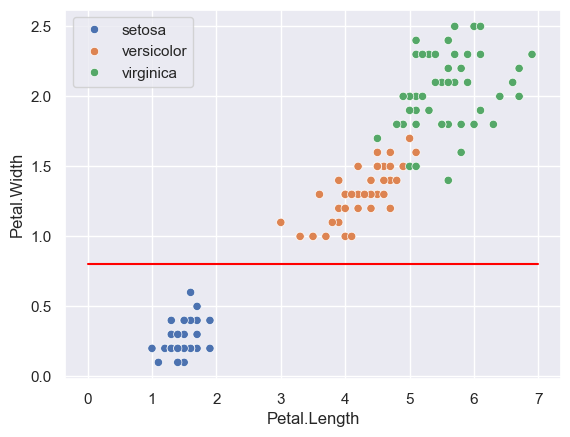

In [6]:
# plot flower data
sns.scatterplot(df, 
                x='Petal.Length', 
                y='Petal.Width', hue='Species')

# plot the model
sns.lineplot(x=[0,7.0], 
             y=[0.8,0.8], 
             color='red')


#### Medium Complexity Tree

Here we limit the depth of the decision tree to 3.

In [7]:
# set up the tree model object
model = tree.DecisionTreeClassifier(criterion='entropy',
                                    max_depth=3, 
                                    random_state=3)

# fit the model on the training data
model.fit(X_train, y_train)
print(tree.export_text(model,
                       feature_names=list(X.columns)))

# Train results: evaluate the model on the training data
y_train_model = model.predict(X_train)
print("Train Accuracy: {:3.2f}"
      .format(metrics.accuracy_score(y_train, y_train_model)))

# Test results: evaluate the model on the testing data
y_test_model = model.predict(X_test)
print("Test Accuracy: {:3.2f}"
      .format(metrics.accuracy_score(y_test, y_test_model)))

|--- Petal.Width <= 0.80
|   |--- class: setosa
|--- Petal.Width >  0.80
|   |--- Petal.Width <= 1.65
|   |   |--- Petal.Length <= 4.95
|   |   |   |--- class: versicolor
|   |   |--- Petal.Length >  4.95
|   |   |   |--- class: virginica
|   |--- Petal.Width >  1.65
|   |   |--- Petal.Length <= 4.85
|   |   |   |--- class: virginica
|   |   |--- Petal.Length >  4.85
|   |   |   |--- class: virginica

Train Accuracy: 0.98
Test Accuracy: 0.98


#### High Complexity Tree

Here we do not place any limits on the structure of the decision tree.

In [8]:
# set up the tree model object
model = tree.DecisionTreeClassifier(criterion='entropy',
                                    max_depth=None, 
                                    random_state=2)

# fit the model on the training data
model.fit(X_train, y_train)
print(tree.export_text(model,
                       feature_names=list(X.columns)))

# Train results: evaluate the model on the training data
y_train_model = model.predict(X_train)
print("Train Accuracy: {:3.2f}"
      .format(metrics.accuracy_score(y_train, y_train_model)))

# Test results: evaluate the model on the testing data
y_test_model = model.predict(X_test)
print("Test Accuracy: {:3.2f}"
      .format(metrics.accuracy_score(y_test, y_test_model)))

|--- Petal.Width <= 0.80
|   |--- class: setosa
|--- Petal.Width >  0.80
|   |--- Petal.Width <= 1.65
|   |   |--- Petal.Length <= 4.95
|   |   |   |--- class: versicolor
|   |   |--- Petal.Length >  4.95
|   |   |   |--- Petal.Width <= 1.55
|   |   |   |   |--- class: virginica
|   |   |   |--- Petal.Width >  1.55
|   |   |   |   |--- class: versicolor
|   |--- Petal.Width >  1.65
|   |   |--- Petal.Length <= 4.85
|   |   |   |--- Sepal.Width <= 3.10
|   |   |   |   |--- class: virginica
|   |   |   |--- Sepal.Width >  3.10
|   |   |   |   |--- class: versicolor
|   |   |--- Petal.Length >  4.85
|   |   |   |--- class: virginica

Train Accuracy: 1.00
Test Accuracy: 0.96


#### Observations

We find that the **testing accuracy** of the three different models behaves just as predicted by our learning curves above, with the medium complexity model having the highest score.
The **training accuracy** also behaves as predicted: the most complex model simply memorizes the dataset,


### Wisconsin Breast Cancer Dataset

Let's try this again with a slightly larger datasest. This data set is available at <a href="https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)">UCI</a>.
The data set describes benign and malignent tumors based on image measurements.

In [9]:
# set up our sklearn data shape for the iris data
df = pd.read_csv(home+"wdbc.csv")
print(df.shape)
df.head()

(569, 32)


,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,2,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,3,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,4,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,5,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


The target variable is 'Diagnosis'.

In [10]:
# see if our data set is balanced
df[['Diagnosis']].value_counts()

Diagnosis
B            357
M            212
Name: count, dtype: int64

**Observation**: Close enough, there is reasonable representation of each class.

In [11]:
# set up our datasets
X  = df.drop(columns=['ID','Diagnosis'])
y = df[['Diagnosis']]

# split the data
(X_train, X_test, y_train, y_test) = \
    model_selection.train_test_split(X, 
                                     y, 
                                     train_size=0.7, 
                                     test_size=0.3, 
                                     random_state=2)

#### Low Complexity Tree

Limit the model to a depth of 1.

In [12]:
# set up the tree model object
model = tree.DecisionTreeClassifier(criterion='entropy',
                                    max_depth=1, 
                                    random_state=1)

# fit the model on the training data
model.fit(X_train, y_train)
print(tree.export_text(model,
                       feature_names=list(X.columns)))

# Train results: evaluate the model on the traing data
y_train_model = model.predict(X_train)
print("Train Accuracy: {:3.2f}"
      .format(metrics.accuracy_score(y_train, y_train_model)))

# Test results: evaluate the model on the testing data
y_test_model = model.predict(X_test)
print("Test Accuracy: {:3.2f}"
      .format(metrics.accuracy_score(y_test, y_test_model)))

|--- perimeter3 <= 105.95
|   |--- class: B
|--- perimeter3 >  105.95
|   |--- class: M

Train Accuracy: 0.93
Test Accuracy: 0.90


#### Medium Complexity Tree

Limit the model to a depth of 4.

In [13]:
# set up the tree model object
model = tree.DecisionTreeClassifier(criterion='entropy',
                                    max_depth=4, 
                                    random_state=2)

# fit the model on the training set of data
model.fit(X_train, y_train)
print(tree.export_text(model,
                       feature_names=list(X.columns)))

# Train results: evaluate the model on the training data
y_train_model = model.predict(X_train)
print("Train Accuracy: {:3.2f}"
      .format(metrics.accuracy_score(y_train, y_train_model)))

# Test results: evaluate the model on the testing data
y_test_model = model.predict(X_test)
print("Test Accuracy: {:3.2f}"
      .format(metrics.accuracy_score(y_test, y_test_model)))

|--- perimeter3 <= 105.95
|   |--- concave_points3 <= 0.14
|   |   |--- area2 <= 46.32
|   |   |   |--- texture3 <= 33.10
|   |   |   |   |--- class: B
|   |   |   |--- texture3 >  33.10
|   |   |   |   |--- class: B
|   |   |--- area2 >  46.32
|   |   |   |--- radius2 <= 0.69
|   |   |   |   |--- class: M
|   |   |   |--- radius2 >  0.69
|   |   |   |   |--- class: B
|   |--- concave_points3 >  0.14
|   |   |--- texture3 <= 27.58
|   |   |   |--- symmetry3 <= 0.36
|   |   |   |   |--- class: B
|   |   |   |--- symmetry3 >  0.36
|   |   |   |   |--- class: M
|   |   |--- texture3 >  27.58
|   |   |   |--- class: M
|--- perimeter3 >  105.95
|   |--- perimeter3 <= 116.05
|   |   |--- texture3 <= 20.36
|   |   |   |--- class: B
|   |   |--- texture3 >  20.36
|   |   |   |--- smoothness1 <= 0.09
|   |   |   |   |--- class: B
|   |   |   |--- smoothness1 >  0.09
|   |   |   |   |--- class: M
|   |--- perimeter3 >  116.05
|   |   |--- class: M

Train Accuracy: 0.99
Test Accuracy: 0.95


#### High Complexity Tree

Unlimited model complexity.

In [14]:
# set up the tree model object
model = tree.DecisionTreeClassifier(criterion='entropy',
                                    max_depth=None, 
                                    random_state=3)

# fit the model on the training set of data
model.fit(X_train, y_train)
print(tree.export_text(model,
                       feature_names=list(X.columns)))

# Train results: evaluate the model on the training data
y_train_model = model.predict(X_train)
print("Train Accuracy: {:3.2f}"
      .format(metrics.accuracy_score(y_train, y_train_model)))

# Test results: evaluate the model on the testing data
y_test_model = model.predict(X_test)
print("Test Accuracy: {:3.2f}"
      .format(metrics.accuracy_score(y_test, y_test_model)))

|--- perimeter3 <= 105.95
|   |--- concave_points3 <= 0.14
|   |   |--- area2 <= 46.32
|   |   |   |--- texture3 <= 33.10
|   |   |   |   |--- class: B
|   |   |   |--- texture3 >  33.10
|   |   |   |   |--- texture3 <= 33.56
|   |   |   |   |   |--- class: M
|   |   |   |   |--- texture3 >  33.56
|   |   |   |   |   |--- class: B
|   |   |--- area2 >  46.32
|   |   |   |--- area3 <= 566.55
|   |   |   |   |--- class: M
|   |   |   |--- area3 >  566.55
|   |   |   |   |--- class: B
|   |--- concave_points3 >  0.14
|   |   |--- texture3 <= 27.58
|   |   |   |--- area3 <= 725.20
|   |   |   |   |--- class: B
|   |   |   |--- area3 >  725.20
|   |   |   |   |--- smoothness3 <= 0.14
|   |   |   |   |   |--- class: B
|   |   |   |   |--- smoothness3 >  0.14
|   |   |   |   |   |--- class: M
|   |   |--- texture3 >  27.58
|   |   |   |--- class: M
|--- perimeter3 >  105.95
|   |--- perimeter3 <= 116.05
|   |   |--- texture3 <= 20.36
|   |   |   |--- class: B
|   |   |--- texture3 >  20.36
| 

#### Observations

Again, we find that the **testing accuracy** of the three different models behaves just as predicted by our learning curves above, with the medium complexity model having the highest score.
The **training accuracy** also behaves as predicted: the most complex model simply memorizes the dataset,


# Model Search

From our discussion above it is clear that in order to find the best model we have to perform a **search** over the model space using parameters that dictate the complexity of the model.  In the case of the decision tree model the tree depth controls the complexity of the model.  In order to find our best model we had to try different values for that parameter, or

> We had to **search** over the model space of the decision tree by trying different values for tree depth in order to find a model with just the right complexity.


## Train and Test

We have already seen that just using a training set for model evaluation does not work! Our solution was to split our data into a training and a test (validation) set.

<img src="https://raw.githubusercontent.com/lutzhamel/ds-assets/main/assets/train-test-data.png" height="200" width="450">

### Issues with Train and Test

* Train-testing relies on randomly splitting the training data into two parts.

* If this split just happens to be a 'bad' split our results might be biased.

An example of a 'bad' split is that by chance all of the instances in our dataset with a particular label wind up in the test set and none in the training set.  In this case, the model has no way to learn about patterns regarding this particular label and will misclassify all of the instances with that label in the test set.

Consider the following example using our iris dataset.

In [15]:
# set up our sklearn data shape for the iris data
df = pd.read_csv(home+"iris.csv").drop(columns=['id'])

# split the data - 70% training 30% testing
# training data does not contain any setosa flowers
X_train = df[df['Species'] != 'setosa'].drop(columns=['Species'])
y_train = df[df['Species'] != 'setosa'][['Species']]

# testing data only contains setosa flowers
X_test = df[df['Species'] == 'setosa'].drop(columns=['Species'])
y_test = df[df['Species'] == 'setosa'][['Species']]

# build a medium complexity tree
# set up the tree model object
model = tree.DecisionTreeClassifier(criterion='entropy',
                                    max_depth=3)

# fit the model on the training set of data
model.fit(X_train, y_train)

# Train results: evaluate the model on the training data
y_train_model = model.predict(X_train)
print("Train Accuracy: {:3.2f}"
      .format(metrics.accuracy_score(y_train, y_train_model)))

# Test results: evaluate the model on the testing data
y_test_model = model.predict(X_test)
print("Test Accuracy: {:3.2f}"
      .format(metrics.accuracy_score(y_test, y_test_model)))

Train Accuracy: 0.99
Test Accuracy: 0.00


**Observation**: As predicted, the model misclassified all of the instances in the test set since
it had no way of learning what a 'Setosa' flower looks like.

**Solution:** Cross-validation


## Cross-Validation

In cross-validation we perform two trials (model constructions) where, in each trial, we switch the roles of our two sets (see the figure below).  In order to evaluate the model performance in cross-validation, we build and evaluate a model in each trial and then take the average performance between the two models as the performance of the cross-validation.  Notice that this will mitigate the 'bad' split issue mentioned above.

**Note**: In cross-validation the testing set is called the **validation set**.



<img src="https://raw.githubusercontent.com/lutzhamel/ds-assets/main/assets/2fold-xval.png" height="400" width="450">


BUT, what if is the split was really bad: e.g. one of the sets does not contain any examples of one of the classes like our Iris example above.

**Solution:** Create more trials - **n-fold cross-validation**

## N-Fold Cross-Validation

Here we do the following:
* perform the split N times,
* then train and test on each fold,
* take the average of the model performance over the folds in order to determine the **cross-validated model performance**

Example:
* 5-fold cross-validation - split the training data into 5 partitions (folds)
* Use each fold as a test/validation set and the other folds as training set
* Multiple splits - even if one is bad it will be balanced out by the others.

<img src="https://raw.githubusercontent.com/lutzhamel/ds-assets/main/assets/5fold-xval.png" height="400" width="450">

**Note**: 5-fold cross-validation is interesting because each trial essentially has an 80-20 split: 80% of the data for training and 20% for testing.  This is one of the more common ways to split a dataset into training and testing sets.

**Note**: We have to train and test models five times in 5-fold cross-validation.

# 5-Fold Cross-Validation and the Iris Data

Let's try this in code.  The nice thing about cross-validation is that it is completely handled by the sklearn module, we don't have to manually split the data etc.

We try this on our iris dataset.

In [16]:
df = pd.read_csv(home+"iris.csv")
X  = df.drop(columns=['id','Species'])
y = df[['Species']]

model = tree.DecisionTreeClassifier(criterion='entropy',
                                    max_depth=3)
print(model)

scores = model_selection.cross_val_score(model, 
                                         X, 
                                         y, 
                                         cv=5) # 5-Fold

print("Fold Accuracies: {}".format(scores))
print("Accuracy: {:3.2f}".format(scores.mean()))

DecisionTreeClassifier(criterion='entropy', max_depth=3)
Fold Accuracies: [0.97 0.97 0.93 0.93 1.00]
Accuracy: 0.96


**Observations**:
* Notice the fold accuracies and how they vary.  That is a typical feature of cross-validation.
* We say that the parameter set criterion='entropy' and max_depth=3 has a cross-validated accuracy of 96%.
* Also notice that at the cross-validation level we do not deal with models, just parameters!

Constructing models in this way is hard work: Choose a set of parameter values, cross-validate it, repeat.  Finally build your model.  There is a better way: model search with **grid search**.

## Model Search and Cross-Validation

Once we switch to a cross-validation approach our model search becomes somewhat different.  Instead of searching over the model space we **search over
the parameter space** for the best set of parameters.

<img src="https://raw.githubusercontent.com/lutzhamel/ds-assets/main/assets/cross-validated-curve.png"  height="300" width="450">

This is due to the fact that cross-validation builds **multiple** models and the cross-validated performance is the **mean performance** of the models built on the various folds. Searching over the parameter space is called **grid search**.


## Model Search as a Grid Search

You probably figured out by now that the only way to find the best model for a particular dataset is to search for it by trying different parameters that control the complexity of the models.  Therefore:

* Finding the best model involves searching for parameter values that give you the best cross-validation accuracy.
* This is usually referred to as the **grid search**.



Sklearn helps us do that efficiently:
Sklearn has a built-in grid search that can optimize the model parameters.  In our case the decision tree classifiers has two parameters: criterion and depth. The grid search will find the optimal value for both of these parameters. The grid search function will return two things:

1. the optimal parameter set
2. the optimal classifier

Consider,

In [17]:
# Grid search with cross-validation for iris dataset

# get data
df = pd.read_csv(home+"iris.csv")
X  = df.drop(columns=['id','Species'])
y = df[['Species']]

# setting up grid search
model = tree.DecisionTreeClassifier(random_state=1)
param_grid = {
    'max_depth': list(range(1,11)),               # search 1..10
    'criterion': ['entropy', 'gini', 'log_loss']  # search different split crit.
    }
grid = model_selection.GridSearchCV(model, 
                                    param_grid, 
                                    cv=5)

# perform grid search
grid.fit(X,y)

# print out best parameters
print("Best parameters: {}".format(grid.best_params_))

# print out the best model
print("Best tree:")
print(tree.export_text(grid.best_estimator_,
                       feature_names=list(X.columns)))

# compute the accuracy of optimal classifier
predict_y = grid.best_estimator_.predict(X)
acc = metrics.accuracy_score(y, predict_y)
print("Accuracy of optimal classifier: {:3.2f}".format(acc))

Best parameters: {'criterion': 'gini', 'max_depth': 4}
Best tree:
|--- Petal.Width <= 0.80
|   |--- class: setosa
|--- Petal.Width >  0.80
|   |--- Petal.Width <= 1.75
|   |   |--- Petal.Length <= 4.95
|   |   |   |--- Petal.Width <= 1.65
|   |   |   |   |--- class: versicolor
|   |   |   |--- Petal.Width >  1.65
|   |   |   |   |--- class: virginica
|   |   |--- Petal.Length >  4.95
|   |   |   |--- Petal.Width <= 1.55
|   |   |   |   |--- class: virginica
|   |   |   |--- Petal.Width >  1.55
|   |   |   |   |--- class: versicolor
|   |--- Petal.Width >  1.75
|   |   |--- Petal.Length <= 4.85
|   |   |   |--- Sepal.Length <= 5.95
|   |   |   |   |--- class: versicolor
|   |   |   |--- Sepal.Length >  5.95
|   |   |   |   |--- class: virginica
|   |   |--- Petal.Length >  4.85
|   |   |   |--- class: virginica

Accuracy of optimal classifier: 0.99


**Note**: **Grid search is computationally very expensive!** In the example above we had three types of splitting criteria (gini/entropy/log loss) and we had 10 levels of depth.  In addition we performed 5-fold cross-validation for each parameter combination.  Doing the math , we built $3{\times}10{\times}5 = 150$ models for the grid search. Building 150 decision trees is not so problematic, the problem really arises when we use computationally expensive models like neural networks.

# Model Accuracy Reexamined

The accuracy score for classifiers we have been looking at so far is a good first look at the 
performance of a classifier.  However, for sensitive classification tasks like biomedical applications
we would like to understand the errors a classifier makes a little bit better.

Consider a classification problem with two classes, then we can observe the following outcomes of a prediction of a classification model:

>**true positive (TP)** -- predicted positive coincides with actual positive
>
>**true negative (TN)** -- predicted negative coincides with actual negative
>
>**false positive (FP)** -- predicted positive but actual negative (Type I error)
>
>**false negative (FN)** -- predicted negative but actual positive (Type II error)
>

**Observation**: Two types of errors possible!

The distinction between these two types of errors is extremely important.  Consider a biomedical diagnostic
decision model predicting the presence of a disease.  A false positive tends to not be problematic in this context because it will simply lead to more tests until it is discovered that the model make a false positive prediction.  The false negative prediction is much more troublesome; the patient is told to be disease free when in fact they are not.  Therefore, practitioners who build models for these kind of sensitive applications try to minimize false negative predictions of the models as much as possible.


### The Confusion Matrix

An easy way to visualize the four outcomes of a binary decision model is the **confusion matrix**.
* We can arrange the predictions in a matrix form
* Errors will show up as values outside the major diagonal

<img src="https://raw.githubusercontent.com/lutzhamel/ds-assets/main/assets/confusion2.png" height="200" width="250">

## The Wisconsin Breast Cancer Data Set

Let's look at the performance of a tree model for the Wisconsin Breast Cancer Dataset using a confusion matrix.

In [18]:
# build an optimal tree model

# get data
df = pd.read_csv(home+"wdbc.csv")

# create our sklearn data
X  = df.drop(columns=['ID','Diagnosis'])
y = df[['Diagnosis']]

# setting up a grid search using 5-fold CV
model = tree.DecisionTreeClassifier(random_state=1)
param_grid = {
    'max_depth': list(range(1,11)),
    'criterion': ['entropy', 'gini', 'log_loss']
    }
grid = model_selection.GridSearchCV(model, param_grid, cv=5)

# performing grid search
grid.fit(X,y)

# create predicted values for target
predict_y = grid.best_estimator_.predict(X)

In [19]:
# M label top-left corner
# we want the malignent tumor prediction to be out "positive"
labels = ['M','B'] 

# build the confusion matrix
cm = metrics.confusion_matrix(y,             # observed target values (rows)
                              predict_y,     # predicted target values (columns)
                              labels=labels) # labels for arranging the cm

# cm is just an array of values, turn it into something readable
cm_df = pd.DataFrame(cm, 
                     index=labels, 
                     columns=labels)

print(cm_df)

     M    B
M  210    2
B    7  350


We see that most of the instances lie on the major diagonal, that means the model predicted those instances correctly.  On the top line we also see that the model had 2 false negatives (predicted malignant as benign) and on the bottom line it had 7 false positives (predicted benign as malignant).



Let's interpret this matrix in more detail.  Summing accross the rows gives us the observed target values.

* M: $210+2=212$
* B: $7+350=357$

Notice that this coincides precisely with the label counts in our data,

In [20]:
df[['Diagnosis']].value_counts()

Diagnosis
B            357
M            212
Name: count, dtype: int64

This is an easy way to check that you set up your confusion matrix correcty!

We can also retrieve our accuracy score from the confusion matrix by summing the errors
the models makes, dividing by the total number of observations and then subtracting 
from 1,

$$
{\rm acc} = 1 - \frac{7+2}{210+2+7+350} = 0.98
$$

We can verify this by using the sklearn builtin,

In [21]:
metrics.accuracy_score(y, predict_y)

0.984182776801406

## The Iris Data Set

Here we are building a **three way confusion matrix** because we have three classification labels.  We apply our grid search to find the best model

In [22]:
# get data
df = pd.read_csv(home+"iris.csv")
X  = df.drop(columns=['id','Species'])
y = df[['Species']]

# setting up grid search
model = model = tree.DecisionTreeClassifier(random_state=1)
param_grid = {
    'max_depth': list(range(1,11)), # search 1..10
    'criterion': ['entropy', 'gini', 'log_loss']
    }
grid = model_selection.GridSearchCV(model, param_grid, cv=5)

# performing grid search and predict target
grid.fit(X,y)
predict_y = grid.best_estimator_.predict(X)

# build and print the confusion matrix
labels = ['setosa','versicolor','virginica'] # labels in alphabetic order
cm = metrics.confusion_matrix(y,         # observed
                              predict_y, # predicted
                              labels=labels)
cm_df = pd.DataFrame(cm, 
                     index=labels, 
                     columns=labels)
print(cm_df)

            setosa  versicolor  virginica
setosa          50           0          0
versicolor       0          50          0
virginica        0           1         49


In a three-way confusion matrix we usually do not talk about false positives or negatives.  We just look for misclassifications and try to characterize them.  In our case the model makes one mistake and misclassifies a single instance of virginica as a versicolor flower.

# Reading

5.3 [Hyperparameters and Model Validation](https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html)

# Midterm

Please refer to the midterm BrightSpace page.